In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt

Importing the dataset and data preprocessing

In [3]:
#read the consolidated CSV file from dataset folder.
df = pd.read_csv('C:/Users/Genesis/OneDrive/Desktop/Projects/Time_Series_Forecasting/Dataset/Dataset.csv')
df

,Date,Actual,Goal
0,May 31 2022,0,8000
1,Jun 1 2022,0,8000
2,Jun 2 2022,0,8000
3,Jun 3 2022,1102,8000
4,Jun 4 2022,1254,8000
...,...,...,...
415,Jul 20 2023,8393,6500
416,Jul 21 2023,5954,6500
417,Jul 22 2023,9550,6500
418,Jul 23 2023,5157,6500


In [4]:
##Check the datatype of date column as we are dealing with Time series data
df['Date'].dtype

dtype('O')

In [5]:
##Changing the data type of date column from object to datetime 
df['Date'] = pd.to_datetime(df['Date'])
print(df)

          Date  Actual  Goal
0   2022-05-31       0  8000
1   2022-06-01       0  8000
2   2022-06-02       0  8000
3   2022-06-03    1102  8000
4   2022-06-04    1254  8000
..         ...     ...   ...
415 2023-07-20    8393  6500
416 2023-07-21    5954  6500
417 2023-07-22    9550  6500
418 2023-07-23    5157  6500
419 2023-07-24    8923  6500

[420 rows x 3 columns]


In [6]:
#Setting index as date
df.set_index("Date",inplace=True)
df

,Actual,Goal
Date,,
2022-05-31,0,8000
2022-06-01,0,8000
2022-06-02,0,8000
2022-06-03,1102,8000
2022-06-04,1254,8000
...,...,...
2023-07-20,8393,6500
2023-07-21,5954,6500
2023-07-22,9550,6500


Exploratory Data Analysis (EDA)

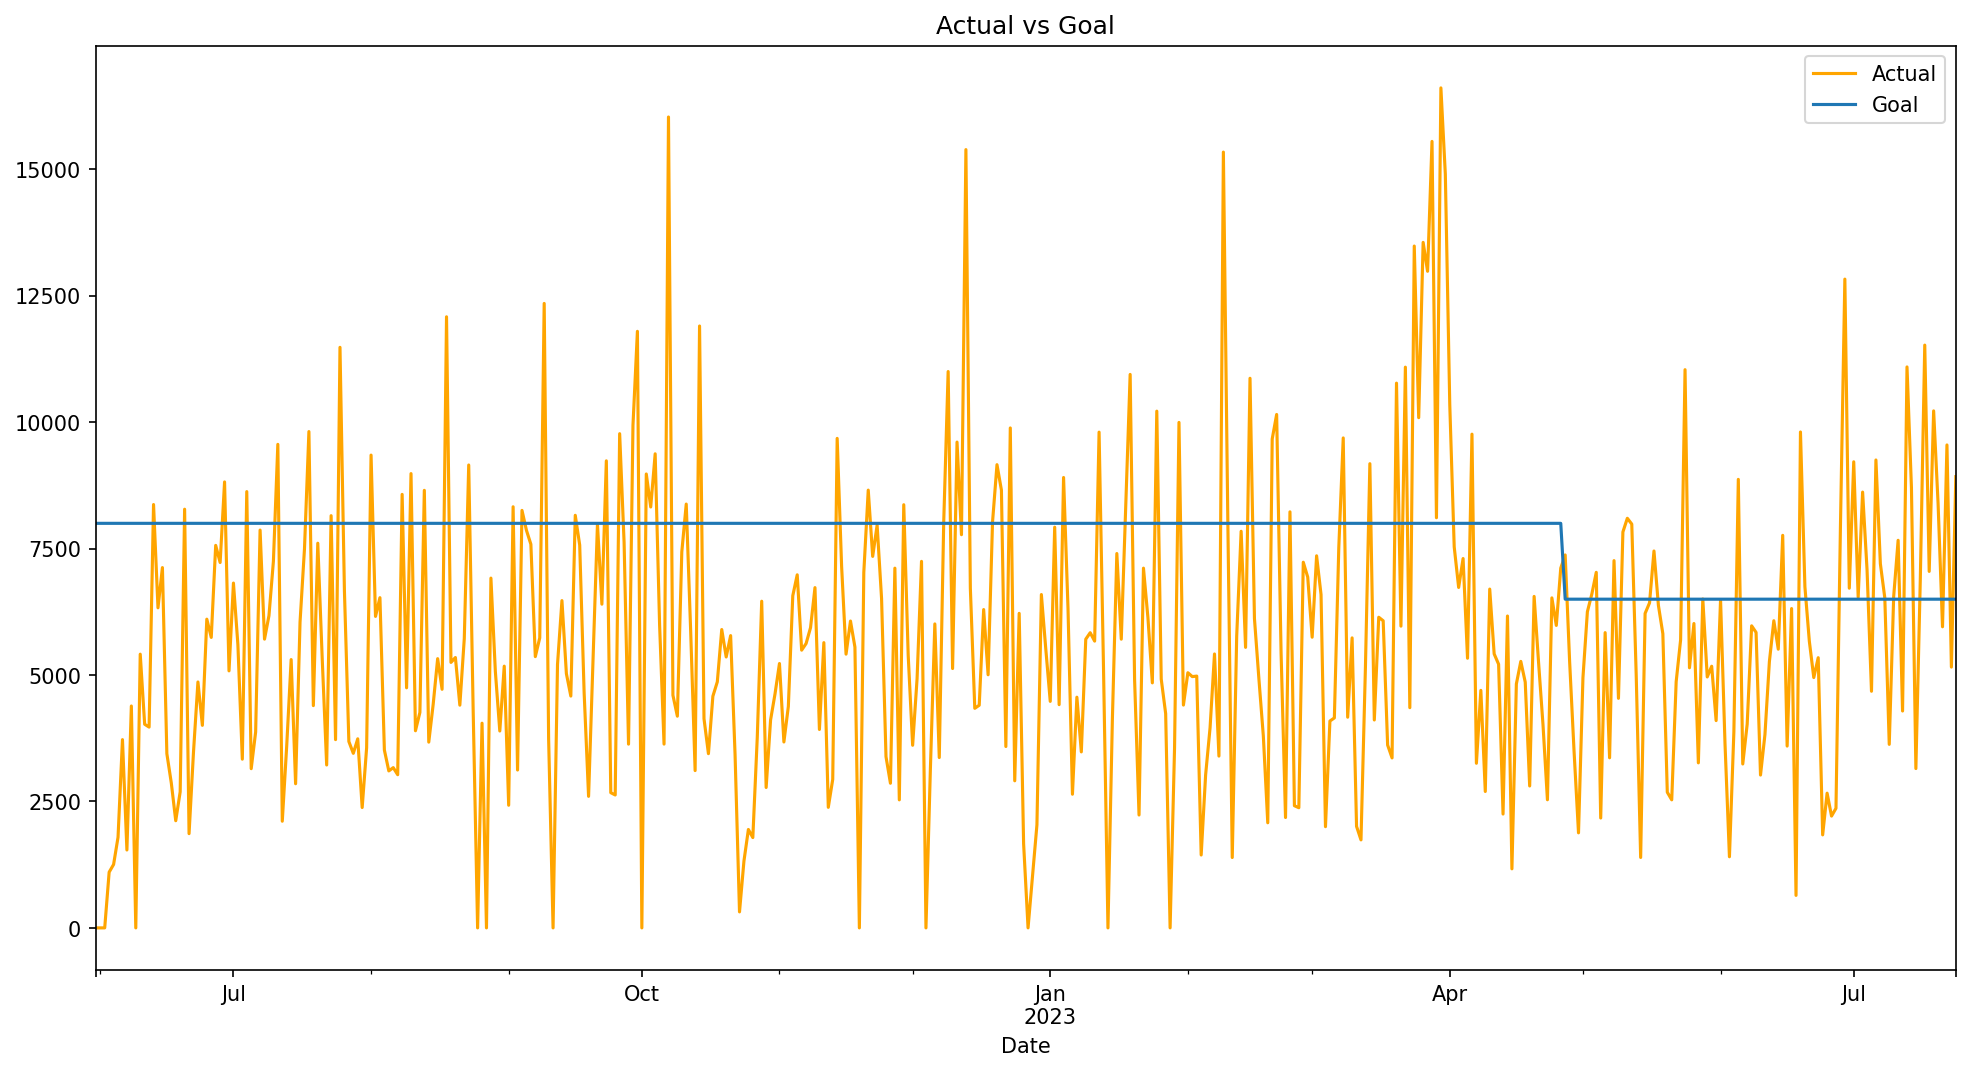

In [7]:
# to set the plot size
plt.figure(figsize=(16, 8), dpi=150)

# using plot method to plot open prices.
# in plot method we set the label and color of the curve.
df['Actual'].plot(label='Actual', color='orange')
df['Goal'].plot(label='Goal')

# adding title to the plot
plt.title('Actual vs Goal')

# adding Label to the x-axis
plt.xlabel('Date')

# adding legend to the curve
plt.legend()


In [8]:
##Resampling the data
df.resample(rule='A').min()

,Actual,Goal
Date,,
2022-12-31,0,8000
2023-12-31,0,6500


In [9]:
#rule A signifies yearly frequency
#rule QS signifies quaterly frequency
df.resample(rule='QS').max()

,Actual,Goal
Date,,
2022-04-01,8819,8000
2022-07-01,12348,8000
2022-10-01,16035,8000
2023-01-01,16611,8000
2023-04-01,12829,8000
2023-07-01,11524,6500


In [10]:
#Checking if any null values exist in the dataset
df.isna().sum()

Actual    0
Goal      0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 420 entries, 2022-05-31 to 2023-07-24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Actual  420 non-null    int64
 1   Goal    420 non-null    int64
dtypes: int64(2)
memory usage: 9.8 KB


In [12]:
#Basic statistics of the working dataset
df.describe()

,Actual,Goal
count,420.000000,420.000000
mean,5674.140476,7682.142857
std,2930.565439,613.717635
min,0.000000,6500.000000
25%,3634.000000,8000.000000
50%,5402.000000,8000.000000
75%,7349.000000,8000.000000
max,16611.000000,8000.000000


<Axes: xlabel='Date'>

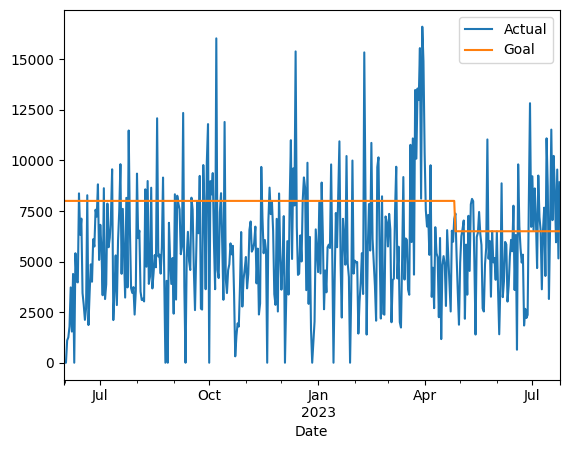

In [13]:
df.plot()

- From The plot the data looks stationary. Still we will do ADF Test to verify the same.
- Seasonality of data is not guaranteed from the plot. But it might be seasonal.

Test for Seasonality and if the data is Stationary

- Performing Differencing

In [18]:
df['Seasonal First Difference']=df['Actual']-df['Actual'].shift(30)
df.head(15)

,Actual,Goal,Seasonal First Difference
Date,,,
2022-05-31,0,8000,NaN
2022-06-01,0,8000,NaN
2022-06-02,0,8000,NaN
2022-06-03,1102,8000,NaN
2022-06-04,1254,8000,NaN
2022-06-05,1792,8000,NaN
2022-06-06,3723,8000,NaN
2022-06-07,1540,8000,NaN
2022-06-08,4388,8000,NaN


In [14]:
#checking for stationarity
#Peform Dicky Fuller Test
from statsmodels.tsa.stattools import adfuller

In [15]:
test_result = adfuller(df['Actual'])

In [16]:
#H0: It is non stationary
#H1: It is stationary

def adfuller_test(actual):
    result=adfuller(actual)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [17]:
adfuller_test(df['Actual'])

ADF Test Statistic : -4.831054414326105
p-value : 4.741516040666627e-05
#Lags Used : 13
Number of Observations Used : 406
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


- Since ADF Test is showing that the data is stationary we are not doing Differencing again to make it stationary.


<Axes: xlabel='Date'>

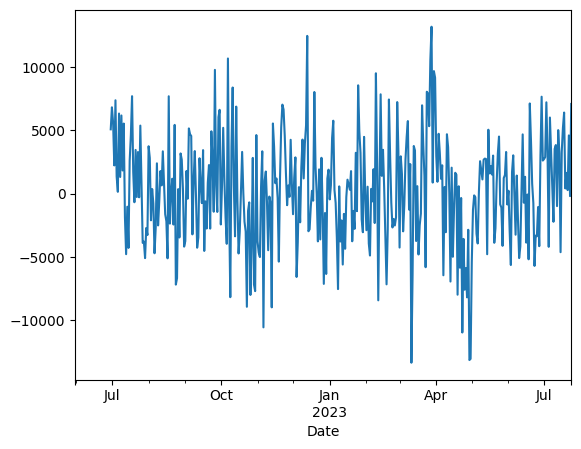

In [20]:
df['Seasonal First Difference'].plot()

- From the plot above we can see that the data is stationary

In [19]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -4.408691922184374
p-value : 0.0002864936199129165
#Lags Used : 13
Number of Observations Used : 376
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


1. Auto Regressive Model

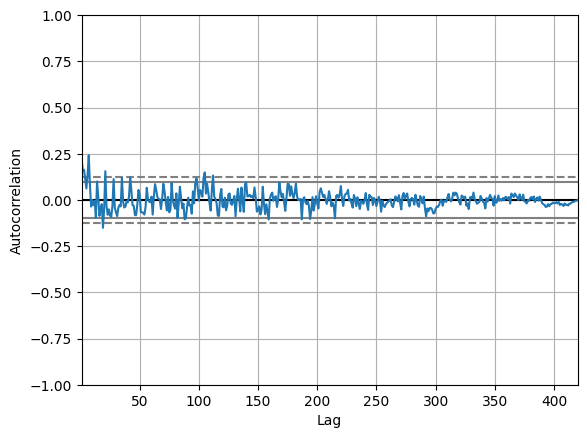

In [21]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Actual'])
plt.show()

- We are trying to perform both ARIMA as well as SARIMAX model on the dataset to predict future steps.
For that First we need to do the AR (Auto regressive) part which is done using PACF

- ARIMA Should not work good with seasonal.

- SARIMAX should work with Seasonal data.

In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

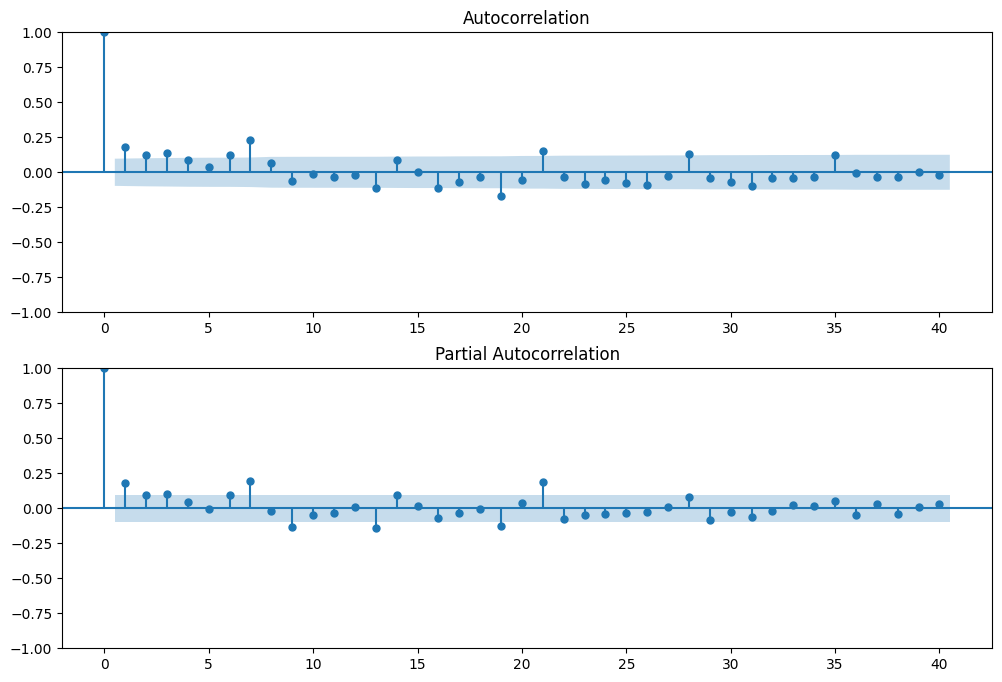

In [23]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Actual'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Actual'].iloc[13:],lags=40,ax=ax2)

In [24]:
train_df = df.loc['2022-05-31':'2023-06-24']
train_df

,Actual,Goal,Seasonal First Difference
Date,,,
2022-05-31,0,8000,NaN
2022-06-01,0,8000,NaN
2022-06-02,0,8000,NaN
2022-06-03,1102,8000,NaN
2022-06-04,1254,8000,NaN
...,...,...,...
2023-06-20,6746,6500,4214.0
2023-06-21,5668,6500,801.0
2023-06-22,4950,6500,-745.0


In [25]:
test_df = df.loc['2023-06-25':'2023-07-24']
test_df

,Actual,Goal,Seasonal First Difference
Date,,,
2023-06-25,2664,6500,-3355.0
2023-06-26,2211,6500,-1052.0
2023-06-27,2365,6500,-4139.0
2023-06-28,7909,6500,2947.0
2023-06-29,12829,6500,7655.0
2023-06-30,6717,6500,2618.0
2023-07-01,9217,6500,2729.0
2023-07-02,6538,6500,2891.0
2023-07-03,8618,6500,7212.0


In [26]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
#p -> AR model lags
#d -> differencing
#q -> moving avg lags 
from statsmodels.tsa.arima_model import ARIMA

In [27]:
model=sm.tsa.arima.ARIMA(train_df['Actual'],order=(1,1,1))
model_fit=model.fit()

c:\Users\Genesis\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Genesis\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Genesis\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [28]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Actual   No. Observations:                  390
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3647.380
Date:                Tue, 08 Aug 2023   AIC                           7300.760
Time:                        20:10:47   BIC                           7312.650
Sample:                    05-31-2022   HQIC                          7305.474
                         - 06-24-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0642      0.061      1.047      0.295      -0.056       0.184
ma.L1         -0.8699      0.027    -32.218      0.000      -0.923      -0.817
sigma2      8.142e+06   5.38e+05     15.123      0.000    7.09e+06     9.2e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                13.36
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.40
Prob(H) (two-sided):                  0.79   Kurtosis:                         3.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

c:\Users\Genesis\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<Axes: xlabel='Date'>

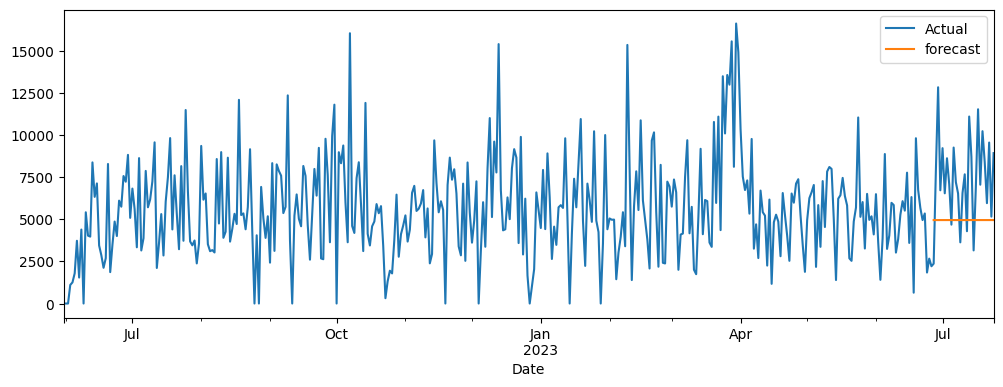

In [29]:
df['forecast']=model_fit.predict(start=392,end=421,dynamic=True)
df[['Actual','forecast']].plot(figsize=(12,4))

In [30]:
model=sm.tsa.statespace.SARIMAX(train_df['Actual'],order=(1, 1, 1),seasonal_order=(1,1,1,90))
results=model.fit()

c:\Users\Genesis\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Genesis\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Genesis\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\Genesis\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed t

In [31]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                             Actual   No. Observations:                  390
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 90)   Log Likelihood               -2843.653
Date:                            Tue, 08 Aug 2023   AIC                           5697.305
Time:                                    20:15:30   BIC                           5715.807
Sample:                                05-31-2022   HQIC                          5704.711
                                     - 06-24-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1516      0.067      2.258      0.024       0.020       0.283
ma.L1         -0.9355      0.025    -37.749      0.000      -0.984      -0.887
ar.S.L90      -0.1691      0.064     -2.625      0.009      -0.295      -0.043
ma.S.L90      -0.9837      0.077    -12.716      0.000      -1.135      -0.832
sigma2      7.728e+06   1.02e-08   7.58e+14      0.000    7.73e+06    7.73e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 9.11
Prob(Q):                              0.75   Prob(JB):                         0.01
Heteroskedasticity (H):               1.32   Skew:                             0.31
Prob(H) (two-sided):                  0.17   Kurtosis:                         3.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.77e+29. Standard errors may be unstable.
"""

c:\Users\Genesis\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<Axes: xlabel='Date'>

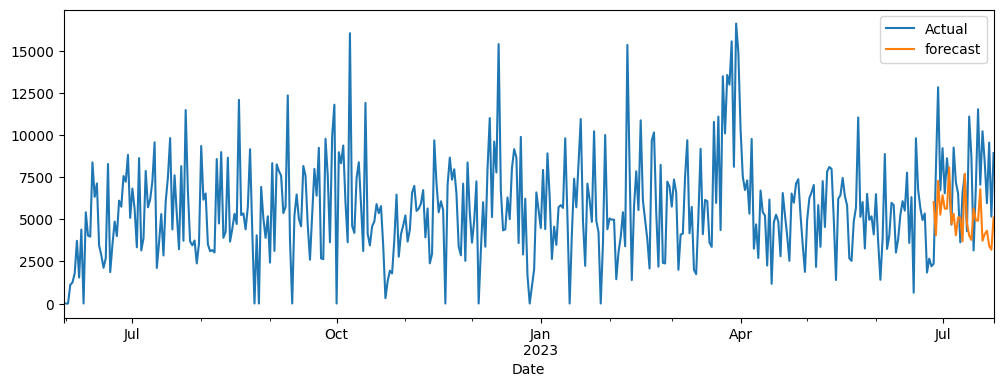

In [35]:
df['forecast']=results.predict(start=392,end=421,dynamic=True)
df[['Actual','forecast']].plot(figsize=(12,4))

In [48]:
actual_steps = test_df[2:]
actual_steps

,Actual,Goal,Seasonal First Difference
Date,,,
2023-06-27,2365,6500,-4139.0
2023-06-28,7909,6500,2947.0
2023-06-29,12829,6500,7655.0
2023-06-30,6717,6500,2618.0
2023-07-01,9217,6500,2729.0
2023-07-02,6538,6500,2891.0
2023-07-03,8618,6500,7212.0
2023-07-04,7081,6500,3203.0
2023-07-05,4679,6500,-4190.0


In [42]:
forecast = df['forecast'].dropna()
forecast

Date
2023-06-27    6023.683950
2023-06-28    4057.214794
2023-06-29    7278.982274
2023-06-30    5273.914159
2023-07-01    6427.720854
2023-07-02    5626.725775
2023-07-03    5627.057522
2023-07-04    8078.548220
2023-07-05    4714.652289
2023-07-06    5323.023369
2023-07-07    4046.234120
2023-07-08    5105.314673
2023-07-09    5100.520475
2023-07-10    3689.157849
2023-07-11    7696.741317
2023-07-12    4771.964680
2023-07-13    4037.700547
2023-07-14    3774.584003
2023-07-15    5637.048221
2023-07-16    4929.392009
2023-07-17    4911.663509
2023-07-18    6787.344621
2023-07-19    3722.080107
2023-07-20    4114.436063
2023-07-21    4320.478888
2023-07-22    3421.513856
2023-07-23    3191.940136
2023-07-24    5095.355572
Name: forecast, dtype: float64

In [45]:
len(forecast)

28

In [43]:
# Compute the mean square error
mse = ((actual_steps - forecast) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 13035303.62
